<a href="https://colab.research.google.com/github/niruinso/PythonRep/blob/main/HomeWork6_GilyazovRasim_09_314.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3

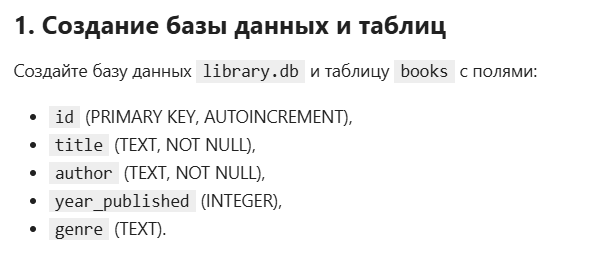

In [25]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
CREATE TABLE IF NOT EXISTS books (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    title TEXT NOT NULL,
    author TEXT NOT NULL,
    year_published INTEGER,
    genre TEXT
);
"""

cursor.execute(query)

connection.commit()

connection.close()

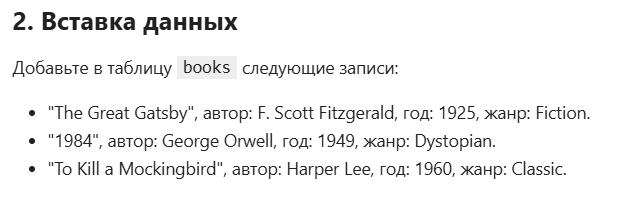

In [26]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

insert_query = """
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?)
"""

data = [
    ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"),
    ("1984", "George Orwell", 1949, "Dystopian"),
    ("To Kill a Mockingbird", "Harper Lee", 1960, "Classic")
]

cursor.executemany(insert_query, data)

connection.commit()

connection.close()


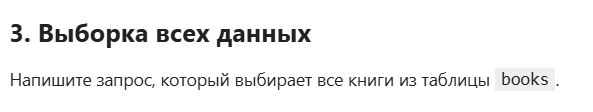

In [5]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
  SELECT * FROM books
"""

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


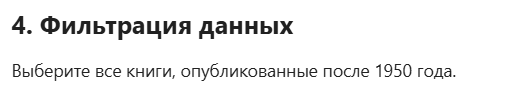

In [6]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
  SELECT * FROM books
  WHERE year_published > 1950
"""

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


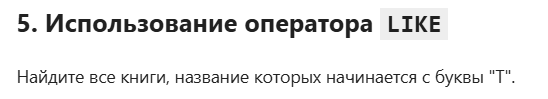

In [7]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
  SELECT * FROM books
  WHERE title LIKE "T%"
"""

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    print(row)
connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


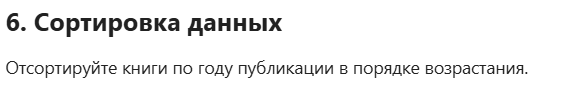

In [8]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
  SELECT * FROM books
  ORDER BY year_published
"""

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1949, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


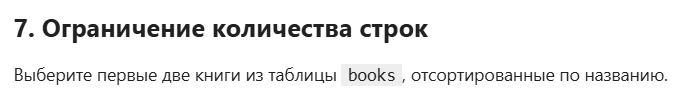

In [9]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
SELECT * FROM books ORDER BY title LIMIT 2;
"""

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

(2, '1984', 'George Orwell', 1949, 'Dystopian')
(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')


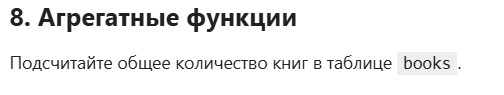

In [10]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
SELECT COUNT(*) from books
"""

cursor.execute(query)

rows = cursor.fetchall()

print(rows[0][0])

connection.close()

3


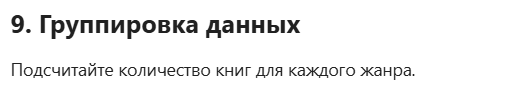

In [11]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

insert_query = """
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?)
"""

data = [
    ("War and Peace", "L. Tolstoy", 1869, "Classic"),
    ("Dead Souls", "Nilo;ay Gogol", 1842, "Classic")
]

cursor.executemany(insert_query, data)

connection.commit()

In [12]:
query = """
SELECT genre, COUNT(*) from books GROUP BY genre
"""

cursor.execute(query)

rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

('Classic', 3)
('Dystopian', 1)
('Fiction', 1)


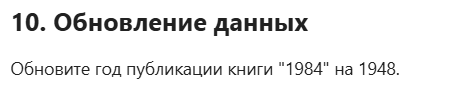

In [13]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
UPDATE books
SET year_published = 1948
WHERE title = "1984";
"""

cursor.execute(query)

select_query = """
  SELECT * FROM books
"""

cursor.execute(select_query)

rows = cursor.fetchall()

for row in rows:
    print(row)

connection.close()

(1, 'The Great Gatsby', 'F. Scott Fitzgerald', 1925, 'Fiction')
(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')
(4, 'War and Peace', 'L. Tolstoy', 1869, 'Classic')
(5, 'Dead Souls', 'Nilo;ay Gogol', 1842, 'Classic')


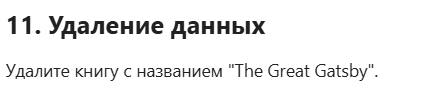

In [14]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
DELETE FROM books
WHERE title = "The Great Gatsby"
"""

cursor.execute(query)

select_query = """
  SELECT * FROM books
"""

cursor.execute(select_query)

rows = cursor.fetchall()

for row in rows:
    print(row)
connection.close()

(2, '1984', 'George Orwell', 1948, 'Dystopian')
(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')
(4, 'War and Peace', 'L. Tolstoy', 1869, 'Classic')
(5, 'Dead Souls', 'Nilo;ay Gogol', 1842, 'Classic')


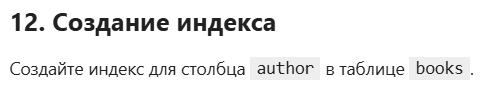

In [15]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
CREATE INDEX IF NOT EXISTS idx_books_author
ON books (author);
"""

cursor.execute(query)

cursor.execute('''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_books_author';
''')

result = cursor.fetchone()

if result:
    print(f"Индекс '{result[0]}' существует.")
else:
    print("Индекс не существует.")
connection.close()

Индекс 'idx_books_author' существует.


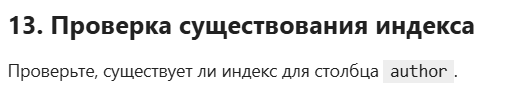

In [16]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
SELECT name FROM sqlite_master WHERE type='index' AND name='idx_books_author';
''')

result = cursor.fetchone()

if result:
    print(f"Индекс '{result[0]}' существует.")
else:
    print("Индекс не существует.")

connection.close()

Индекс 'idx_books_author' существует.


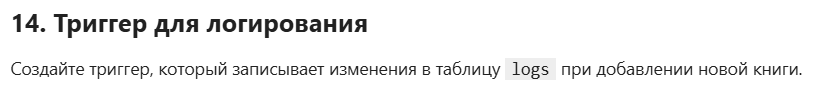

In [17]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE TABLE IF NOT EXISTS books_logs (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    book_id INTEGER,
    action TEXT,
    timestamp DATETIME DEFAULT CURRENT_TIMESTAMP
);
''')

cursor.execute('''
CREATE TRIGGER IF NOT EXISTS log_books_changes
AFTER INSERT ON books
FOR EACH ROW
BEGIN
    INSERT INTO books_logs (book_id, action)
    VALUES (NEW.id, 'INSERT');
END;
''')



cursor.execute("""
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
""", ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"))



cursor.execute('''
SELECT * FROM books_logs
''')
data = cursor.fetchall()
for i in data:
    print(i)

connection.commit()
connection.close()

(1, 6, 'INSERT', '2025-04-27 11:24:13')


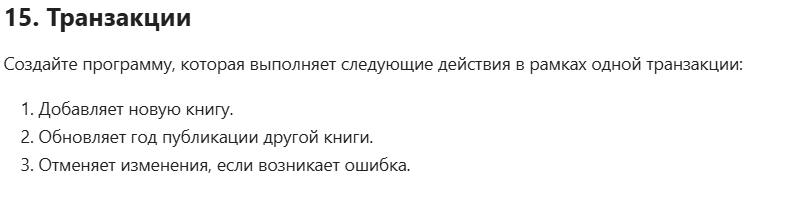

In [18]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

try:
    cursor.execute('BEGIN TRANSACTION')

    cursor.execute("""
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
""", ("The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"))

    cursor.execute("""
INSERT INTO books (title, author, year_published, genre)
VALUES (?, ?, ?, ?);
""", ("MY_The Great Gatsby", "F. Scott Fitzgerald", 1925, "Fiction"))

    cursor.execute('''
    UPDATE books
    SET year_published_error = year_published + 1
    WHERE title = "1984";
    ''')

    connection.commit()
    print("Транзакция успешно завершена.")
except Exception as e:
    connection.rollback()
    print(f"Ошибка: {e}. Изменения отменены.")
finally:
    connection.close()

Ошибка: no such column: year_published_error. Изменения отменены.


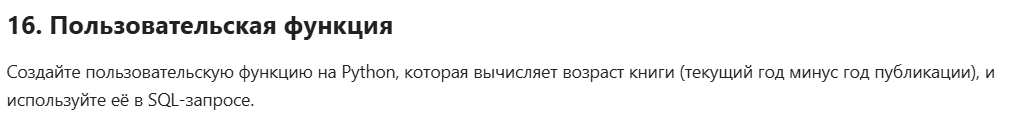

In [19]:
from datetime import datetime

def calculate_book_age(year_published):
    current_year = datetime.now().year
    return current_year - year_published

connection = sqlite3.connect('library.db')

connection.create_function('book_age', 1, calculate_book_age)


cursor = connection.cursor()

cursor.execute('''
SELECT title, year_published, book_age(year_published)
FROM books
''')
books_with_age = cursor.fetchall()

for book in books_with_age:
    print(f"{book[0]} ({book[1]}): {book[2]} лет")

connection.close()

The Great Gatsby (1925): 100 лет
1984 (1949): 76 лет
To Kill a Mockingbird (1960): 65 лет
War and Peace (1869): 156 лет
Dead Souls (1842): 183 лет
The Great Gatsby (1925): 100 лет


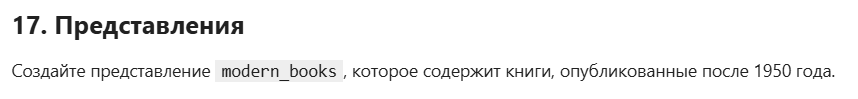

In [21]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

cursor.execute('''
CREATE VIEW IF NOT EXISTS modern_books AS
SELECT * FROM books WHERE year_published > 1950
''')
connection.commit()


cursor.execute('SELECT * FROM modern_books')
modern_books = cursor.fetchall()


for book in modern_books:
    print(book)

connection.close()

(3, 'To Kill a Mockingbird', 'Harper Lee', 1960, 'Classic')


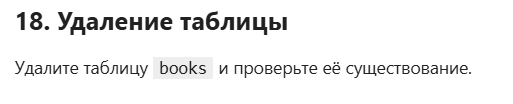

In [23]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()


cursor.execute('DROP TABLE IF EXISTS books')
connection.commit()

cursor.execute('''
SELECT name FROM sqlite_master
WHERE type='table' AND name='books'
''')
table_exists = cursor.fetchone()

if table_exists:
    print("Таблица books не была удалена")
else:
    print("Таблица books успешно удалена")

Таблица books успешно удалена


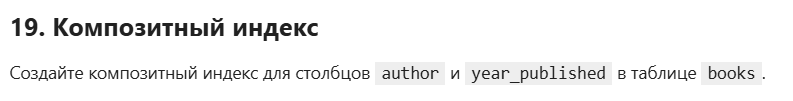

In [27]:
connection = sqlite3.connect('library.db')
cursor = connection.cursor()

query = """
CREATE INDEX IF NOT EXISTS idx_books_author
ON books (author);
"""

cursor.execute(query)
connection.close()

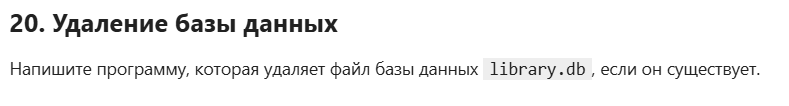

In [29]:
import os
if os.path.exists('library.db'):
    os.remove('library.db')
    print("Файл базы данных library.db удален")
else:
    print("Файл базы данных library.db не существует")

Файл базы данных library.db не существует


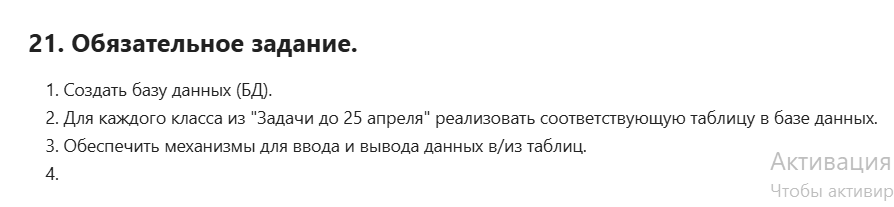

In [ ]:
connection = sqlite3.connect('oop.db')
cursor = connection.cursor()

classes = ['bicycle', 'Skis', 'TennisRacket', 'Customer', ' Rental']

for i in range(len(classes)):
    classes[i] = tuple(classes[i].strip().lower())




bicycle_query = """
CREATE TABLE IF NOT EXISTS bicycle (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    condition TEXT NOT NULL,
    hourly_rate REAL CHECK(hourly_rate>=0),
    bike_type TEXT NOT NULL,
    is_available INTEGER DEFAULT 1);
  """
skis_query = """
CREATE TABLE IF NOT EXISTS skis (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    condition TEXT NOT NULL,
    hourly_rate REAL CHECK(hourly_rate>=0),
    length REAL CHECK(length>0),
    is_available INTEGER DEFAULT 1);
  """
tennisracket_query = """
CREATE TABLE IF NOT EXISTS tennisracket (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    condition TEXT NOT NULL,
    hourly_rate REAL CHECK(hourly_rate>=0),
    string_tension REAL CHECK(string_tension>0),
    is_available INTEGER DEFAULT 1);
"""
customer_query = """
CREATE TABLE IF NOT EXISTS customer (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL);
"""
rental_query = """
CREATE TABLE IF NOT EXISTS rental (
    rental_id INTEGER PRIMARY KEY AUTOINCREMENT,
    customer_id INTEGER NOT NULL,
    bicycle_id INTEGER,
    tennisracket_id INTEGER,
    skis_id INTEGER,
    start_time TEXT NOT NULL,
    end_time TEXT
    );
"""
cursor.execute(bicycle_query)
cursor.execute(skis_query)
cursor.execute(tennisracket_query)
cursor.execute(customer_query)
cursor.execute(rental_query)

def load_bicycle(data: 'Bicycle') -> None:
    query = '''
    INSERT INTO bicycle (name, condition, hourly_rate, type)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.type))
    connection.commit()

def load_skis(data: 'Skis') -> None:
    query = '''
    INSERT INTO skis (name, condition, hourly_rate, length)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.length))
    connection.commit()


def load_tennisracket(data: 'TennisRacket') -> None:
    query = '''
    INSERT INTO tennisracket (name, condition, hourly_rate, string_tension)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.string_tension))
    connection.commit()


def load_customer(data: 'Customer') -> None:
    query = '''
    INSERT INTO bicycle (name, condition, hourly_rate, type)
VALUES (?, ?, ?, ?);
'''
    cursor.execute(query, (data.name, data.condition, data.hourly_rate, data.type))
    connection.commit()



def load_rental(data: 'Rental') -> None:
    query = '''
    INSERT INTO rental (customer_id, bicycle_id, tennisracket_id, skis_id, start_time, end_time)
VALUES (?, ?, ?, ?, ?, ?);
'''

    if hasattr(data.equipment, 'bike_type'):
        cursor.execute(query, (data.customer_id, data.equipment.id, -1, -1, data.start_time, data.end_time))
    elif hasattr(data.equipment, 'length'):
        cursor.execute(query, (data.customer_id, -1, -1, data.equipment.id, data.start_time, data.end_time))
    elif hasattr(data.equipment, 'string_tension'):
        cursor.execute(query, (data.customer_id, -1, data.equipment.id, -1, data.start_time, data.end_time))
    connection.commit()


def get_data(name: str):
    cursor.execute(f"""SELECT * FROM {name}""")
    return cursor.fetchall()